In [ ]:
import os
# import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
# import seaborn as sn
from sklearn import model_selection
# from sklearn import preprocessing
import IPython.display as ipd
from tqdm import tqdm

## Preparation

In [ ]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

In [ ]:
# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [ ]:
# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

In [ ]:
# display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    plt.colorbar()
    plt.show()

In [ ]:
# This values are necessary to create and reshape data arrays
freq = 128
time = 1723

In [ ]:
!kaggle datasets download -d mmoreaux/environmental-sound-classification-50

Dataset URL: https://www.kaggle.com/datasets/mmoreaux/environmental-sound-classification-50
License(s): CC-BY-NC-SA-4.0
100% 1.42G/1.42G [01:18<00:00, 21.6MB/s]
100% 1.42G/1.42G [01:18<00:00, 19.4MB/s]


In [ ]:
!unzip /content/environmental-sound-classification-50.zip -d /content/environmental-sound-classification-50/

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-188822-C-40.wav  
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-188822-D-40.wav  
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-196688-A-8.wav  
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-205966-A-16.wav  
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-209471-A-25.wav  
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-209472-A-25.wav  
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-209473-A-25.wav  
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-209474-A-25.wav  
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-209475-A-25.wav  
  inflating: /content/environmental-sound-classification-50/audio/audio/16000/2-209476-A-25.

In [ ]:
# define directories
base_dir = "/content/environmental-sound-classification-50"
esc_dir = os.path.join(base_dir, "ESC-50-master")
meta_file = os.path.join(base_dir, "esc50.csv")
audio_dir = os.path.join(base_dir, "audio/audio/44100/")

In [ ]:
# load metadata
meta_data = pd.read_csv(meta_file)
meta_data

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


In [ ]:
# get data size
data_size = meta_data.shape
print(data_size)

(2000, 7)


In [ ]:
# arrange target label and its name
class_dict = {}
for i in range(data_size[0]):
    if meta_data.loc[i,"target"] not in class_dict.keys():
        class_dict[meta_data.loc[i,"target"]] = meta_data.loc[i,"category"]
class_pd = pd.DataFrame(list(class_dict.items()), columns=["labels","classes"])
class_pd

,labels,classes
0,0,dog
1,14,chirping_birds
2,36,vacuum_cleaner
3,19,thunderstorm
4,30,door_wood_knock
5,34,can_opening
6,9,crow
7,22,clapping
8,48,fireworks
9,41,chainsaw


## Hint:
It strongly recommended to use kaggle notebook to access data quickly and not mess with library issues.
The trained model with %20 validation data and %10 test data are available on
https://www.kaggle.com/tubistaj/model-files and
https://www.kaggle.com/tubistaj/test-array.

If you prefer use them you can continue with section ***Evaluate model***.
Otherwise, of course you are free to go ahead

## Load dataset

wave size:(220500,)
melsp size:(128, 1723)
samping rate:44100


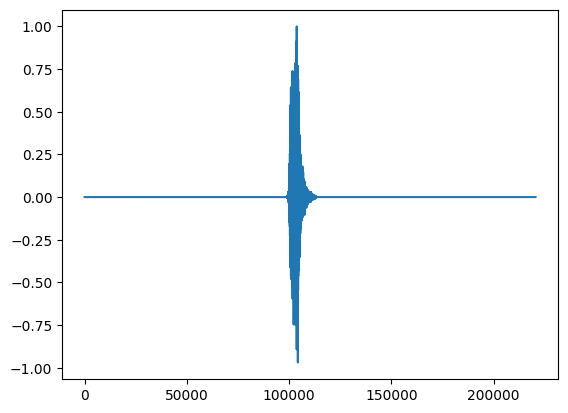

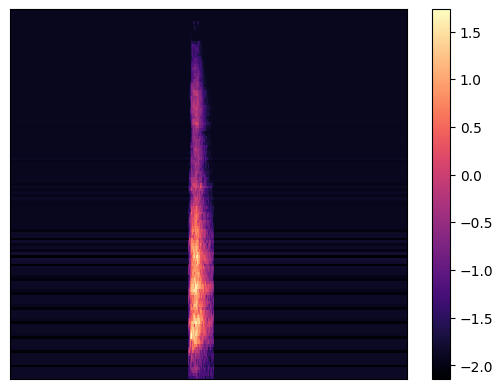

In [ ]:
# example data
x, fs = load_wave_data(audio_dir, meta_data.loc[0,"filename"])
melsp = calculate_melsp(x)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x)
show_melsp(melsp, fs)

In [ ]:
ipd.Audio(x, rate=fs)

## Augment audio data

The augmented data available on https://www.kaggle.com/tubistaj/esc50aug, with using it you can pass this sections up to *Audio Classification with Deep Learning* section

The number of end of file names indicates the rate of splitting data in train and test. ie. esc_melsp_train_raw3.npz means %30 test rate.

However, if you do not want to use link you can go ahead.

In [ ]:
# data augmentation: add white noise
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

wave size:(220500,)
melsp size:(128, 1723)
samping rate:44100


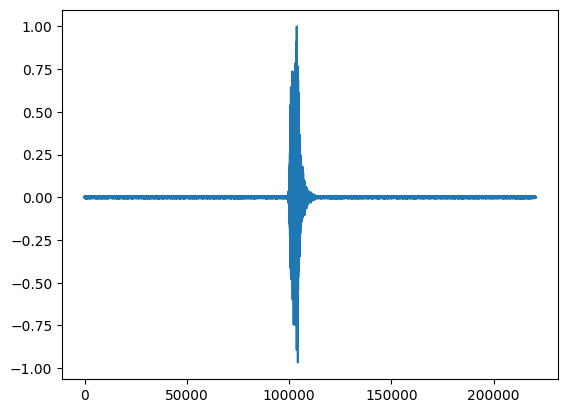

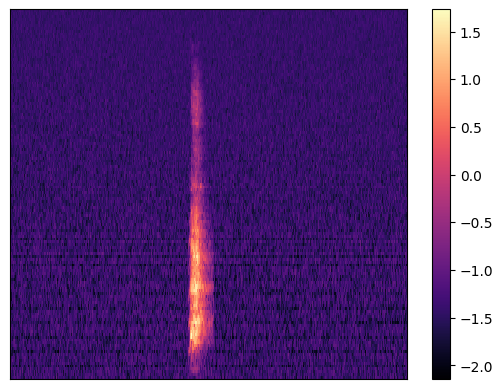

In [ ]:
x_wn = add_white_noise(x)
melsp = calculate_melsp(x_wn)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_wn.shape, melsp.shape, fs))
show_wave(x_wn)
show_melsp(melsp, fs)

In [ ]:
ipd.Audio(x_wn, rate=fs)

In [ ]:
# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

wave size:(220500,)
melsp size:(128, 1723)
samping rate:44100


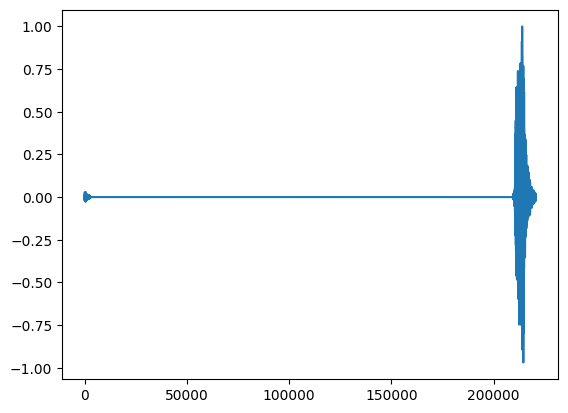

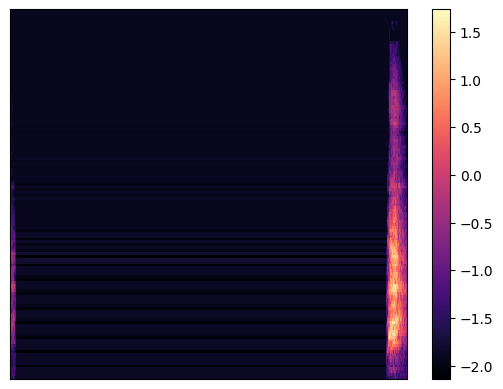

In [ ]:
x_ss = shift_sound(x)
melsp = calculate_melsp(x_ss)
print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x_ss.shape, melsp.shape, fs))
show_wave(x_ss)
show_melsp(melsp, fs)

In [ ]:
ipd.Audio(x_ss, rate=fs)

## Split training dataset and test dataset

In [ ]:
# get training dataset and target dataset
x = list(meta_data.loc[:, "filename"])
y = list(meta_data.loc[:, "target"])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, stratify=y)
print("x train:{0}\ny train:{1}\nx test:{2}\ny test:{3}".format(len(x_train), len(y_train), len(x_test), len(y_test)))

x train:1500
y train:1500
x test:500
y test:500


## Transform wav data to mel-stft array

Transform wav data files to mel-stft array, and save them as npz, separately with test, training and augmented training datasets.


In [ ]:
# save wave data in npz, with augmentation
def save_np_data(filename, x, y, aug=None, rates=None):
    np_data = np.zeros(freq*time*len(x)).reshape(len(x), freq, time)
    np_targets = np.zeros(len(y))
    for i in range(len(y)):
        _x, fs = load_wave_data(audio_dir, x[i])
        if aug is not None:
            _x = aug(x=_x, rate=rates[i])
        _x = calculate_melsp(_x)
        np_data[i] = _x
        np_targets[i] = y[i]
    np.savez(filename, x=np_data, y=np_targets)

In [ ]:
# save test dataset
if not os.path.exists("esc_melsp_test.npz"):
    save_np_data("esc_melsp_test.npz", x_test,  y_test)

In [ ]:
# save raw training dataset
if not os.path.exists("esc_melsp_train_raw.npz"):
    save_np_data("esc_melsp_train_raw.npz", x_train,  y_train)

In [ ]:
# save training dataset with white noise
if not os.path.exists("esc_melsp_train_wn.npz"):
    rates = np.random.randint(1,50,len(x_train))/10000
    save_np_data("esc_melsp_train_wn.npz", x_train,  y_train, aug=add_white_noise, rates=rates)

In [ ]:
# save training dataset with sound shift
if not os.path.exists("esc_melsp_train_ss.npz"):
    rates = np.random.choice(np.arange(2,6),len(y_train))
    save_np_data("esc_melsp_train_ss.npz", x_train,  y_train, aug=shift_sound, rates=rates)

In [ ]:
# save training dataset with combination of white noise and shift
if not os.path.exists("esc_melsp_train_com.npz"):
    np_data = np.zeros(freq*time*len(x_train)).reshape(len(x_train), freq, time)
    np_targets = np.zeros(len(y_train))
    for i in range(len(y_train)):
        x, fs = load_wave_data(audio_dir, x_train[i])
        x = add_white_noise(x=x, rate=np.random.randint(1,50)/1000)
        x = shift_sound(x=x, rate=np.random.choice(np.arange(2,6)))
        x = calculate_melsp(x)
        np_data[i] = x
        np_targets[i] = y_train[i]
    np.savez("esc_melsp_train_com.npz", x=np_data, y=np_targets)

In [ ]:
!mkdir /content/test_dataset/
!mkdir /content/train_dataset/
!mv /content/esc_melsp_test.npz /content/test_dataset/esc_melsp_test.npz
!mv /content/esc_melsp_train_raw.npz /content/train_dataset/esc_melsp_train_raw.npz
!mv /content/esc_melsp_train_wn.npz /content/train_dataset/esc_melsp_train_wn.npz
!mv /content/esc_melsp_train_ss.npz /content/train_dataset/esc_melsp_train_ss.npz
!mv /content/esc_melsp_train_com.npz /content/train_dataset/esc_melsp_train_com.npz

# Audio classification with deep learning


## Preparation for deep learning

In [ ]:
"""
import numpy as np
from pathlib import Path
import torch
from torch.utils.data import Dataset, DataLoader

class ESC50Dataset_train(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        #print(list(Path(data_dir).glob('*.npz'))[1])
        self.data1 = np.load(list(Path(data_dir).glob('*.npz'))[0])
        self.x1 = torch.from_numpy(self.data1["x"]).float()
        self.y1 = torch.from_numpy(self.data1["y"]).long()
        self.data2 = np.load(list(Path(data_dir).glob('*.npz'))[1])
        self.x2 = torch.from_numpy(self.data2["x"]).float()
        self.y2 = torch.from_numpy(self.data2["y"]).long()
        self.data3 = np.load(list(Path(data_dir).glob('*.npz'))[2])
        self.x3 = torch.from_numpy(self.data3["x"]).float()
        self.y3 = torch.from_numpy(self.data3["y"]).long()
        self.data4 = np.load(list(Path(data_dir).glob('*.npz'))[3])
        self.x4 = torch.from_numpy(self.data4["x"]).float()
        self.y4 = torch.from_numpy(self.data4["y"]).long()
        self.x = torch.cat((self.x1, self.x2, self.x3, self.x4), 0)
        self.y = torch.cat((self.y1, self.y2, self.y3, self.y4), 0)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_dataset = ESC50Dataset_train("/content/train_dataset/")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
"""

'\nimport numpy as np\nfrom pathlib import Path\nimport torch\nfrom torch.utils.data import Dataset, DataLoader\n\nclass ESC50Dataset_train(Dataset):\n    def __init__(self, data_dir):\n        self.data_dir = data_dir\n        #print(list(Path(data_dir).glob(\'*.npz\'))[1])\n        self.data1 = np.load(list(Path(data_dir).glob(\'*.npz\'))[0])\n        self.x1 = torch.from_numpy(self.data1["x"]).float()\n        self.y1 = torch.from_numpy(self.data1["y"]).long()\n        self.data2 = np.load(list(Path(data_dir).glob(\'*.npz\'))[1])\n        self.x2 = torch.from_numpy(self.data2["x"]).float()\n        self.y2 = torch.from_numpy(self.data2["y"]).long()\n        self.data3 = np.load(list(Path(data_dir).glob(\'*.npz\'))[2])\n        self.x3 = torch.from_numpy(self.data3["x"]).float()\n        self.y3 = torch.from_numpy(self.data3["y"]).long()\n        self.data4 = np.load(list(Path(data_dir).glob(\'*.npz\'))[3])\n        self.x4 = torch.from_numpy(self.data4["x"]).float()\n        self.y4

In [ ]:
import numpy as np
from pathlib import Path
import torch
from torch.utils.data import Dataset, DataLoader

class ESC50Dataset_train(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        #print(list(Path(data_dir).glob('*.npz'))[1])
        self.data1 = np.load(list(Path(data_dir).glob('*.npz'))[0])
        self.x1 = torch.from_numpy(self.data1["x"]).float()
        self.y1 = torch.from_numpy(self.data1["y"]).long()
        self.data4 = np.load(list(Path(data_dir).glob('*.npz'))[3])
        self.x4 = torch.from_numpy(self.data4["x"]).float()
        self.y4 = torch.from_numpy(self.data4["y"]).long()
        self.x = torch.cat((self.x1, self.x4), 0)
        self.y = torch.cat((self.y1, self.y4), 0)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_dataset = ESC50Dataset_train("/content/train_dataset/")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
print("train_dataset:", len(train_dataset))

train_dataset: 3000


NameError: name 'test_dataset' is not defined

In [ ]:
for i in train_loader:
  print(i[1])
  print(i[0].shape)
  break

tensor([15,  5, 27, 38, 31, 24,  8, 37, 40, 39, 23,  7, 25, 21, 34, 43, 38, 32,
        30, 15, 13, 20, 27, 11, 31, 43, 22,  2, 21, 10, 49, 21])
torch.Size([32, 128, 1723])


## Define convolutional neural network

In [ ]:
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, classes):
        super(CNNModel, self).__init__()

        self.layer01 = nn.Sequential(nn.Conv2d(1,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer02 = nn.Sequential(nn.Conv2d(16,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer03 = nn.MaxPool2d(2)
        self.layer04 = nn.Sequential(nn.Conv2d(16,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer05 = nn.Sequential(nn.Conv2d(32,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer06 = nn.MaxPool2d(2)

        self.layer11 = nn.Sequential(nn.Conv2d(1,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer12 = nn.Sequential(nn.Conv2d(16,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer13 = nn.MaxPool2d(2)
        self.layer14 = nn.Sequential(nn.Conv2d(16,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer15 = nn.Sequential(nn.Conv2d(32,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer16 = nn.MaxPool2d(2)

        self.layer21 = nn.Sequential(nn.Conv2d(1,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer22 = nn.Sequential(nn.Conv2d(16,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer23 = nn.MaxPool2d(2)
        self.layer24 = nn.Sequential(nn.Conv2d(16,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer25 = nn.Sequential(nn.Conv2d(32,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer26 = nn.MaxPool2d(2)

        self.layer31 = nn.Sequential(nn.Conv2d(1,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer32 = nn.Sequential(nn.Conv2d(16,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer33 = nn.MaxPool2d(2)
        self.layer34 = nn.Sequential(nn.Conv2d(16,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer35 = nn.Sequential(nn.Conv2d(32,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer36 = nn.MaxPool2d(2)

        self.layer41 = nn.Sequential(nn.Conv2d(128,64,kernel_size=3,padding=1),nn.BatchNorm2d(64),nn.ReLU())
        self.layer42 = nn.Sequential(nn.Conv2d(64,64,kernel_size=3,padding=1),nn.BatchNorm2d(64),nn.ReLU())
        self.layer43 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(220160, 256)
        self.fc2 = nn.Linear(256, classes)

    def forward(self, x):
        #print(x.shape)
        x = x.unsqueeze(1)
        #print(x.shape)
        x1 = self.layer01(x)
        #print(x1.shape)
        x1 = self.layer02(x1)
        x1 = self.layer03(x1)
        x1 = self.layer04(x1)
        x1 = self.layer05(x1)
        x1 = self.layer06(x1)
        x2 = self.layer01(x)
        x2 = self.layer02(x2)
        x2 = self.layer03(x2)
        x2 = self.layer04(x2)
        x2 = self.layer05(x2)
        x2 = self.layer06(x2)
        x3 = self.layer01(x)
        x3 = self.layer02(x3)
        x3 = self.layer03(x3)
        x3 = self.layer04(x3)
        x3 = self.layer05(x3)
        x3 = self.layer06(x3)
        x4 = self.layer01(x)
        x4 = self.layer02(x4)
        x4 = self.layer03(x4)
        x4 = self.layer04(x4)
        x4 = self.layer05(x4)
        x4 = self.layer06(x4)

        # Combine the result from four block and output it
        #print(x1.shape)
        x_sum = torch.cat((x1,x2,x3,x4),1)
        #print(x_sum.shape)
        x_sum = self.layer41(x_sum)
        x_sum = self.layer42(x_sum)
        x_sum = self.layer43(x_sum)
        x_sum = torch.flatten(x_sum, 1)
        x_sum = self.fc1(x_sum)
        x_sum = self.fc2(x_sum)

        return x_sum

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer2 = nn.Sequential(nn.Conv2d(16,16,kernel_size=3,padding=1),nn.BatchNorm2d(16),nn.ReLU())
        self.layer3 = nn.MaxPool2d(2)

        self.layer4 = nn.Sequential(nn.Conv2d(16,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer5 = nn.Sequential(nn.Conv2d(32,32,kernel_size=3,padding=1),nn.BatchNorm2d(32),nn.ReLU())
        self.layer6 = nn.MaxPool2d(2)

        self.layer7 = nn.Sequential(nn.Conv2d(32,64,kernel_size=3,padding=1),nn.BatchNorm2d(64),nn.ReLU())
        self.layer8 = nn.Sequential(nn.Conv2d(64,64,kernel_size=3,padding=1),nn.BatchNorm2d(64),nn.ReLU())
        self.layer9 = nn.MaxPool2d(2)

        self.layer10 = nn.Sequential(nn.Conv2d(64,128,kernel_size=3,padding=1),nn.BatchNorm2d(128),nn.ReLU())
        self.layer11 = nn.Sequential(nn.Conv2d(128,128,kernel_size=3,padding=1),nn.BatchNorm2d(128),nn.ReLU())
        self.layer12 = nn.MaxPool2d(2)

        self.layer13 = nn.Sequential(nn.Conv2d(128,256,kernel_size=3,padding=1),nn.BatchNorm2d(256),nn.ReLU())
        self.layer14 = nn.Sequential(nn.Conv2d(256,256,kernel_size=3,padding=1),nn.BatchNorm2d(256),nn.ReLU())
        self.layer15 = nn.MaxPool2d(2) #

        self.layer16 = nn.Sequential(nn.Conv2d(256,512,kernel_size=3,padding=1),nn.BatchNorm2d(512),nn.ReLU())
        self.layer17 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(220544, 128)
        self.fc2 = nn.Linear(128, 50)

    def forward(self, x):
        x = x.unsqueeze(1)
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = self.layer14(out)
        out = self.layer15(out)
        out = self.layer16(out)
        out = self.layer17(out)
        print(out.shape)
        x = torch.flatten(x, 1)
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
if torch.cuda.is_available():
    print('GPU is available.')
    device = torch.device('cuda')
else:
    print('GPU is not available. Training on CPU.')
    device = torch.device('cpu')

GPU is available.


In [ ]:
net = CNNModel(50)
net.to(device)

CNNModel(
  (layer01): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer02): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer03): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer04): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer05): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer06): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [ ]:
torch.cuda.empty_cache()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

for epoch in range(40):
    train_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        #print(inputs.shape)
        outputs = net(inputs)
        #print(outputs.shape)
        #print(labels)
        #print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss = train_loss + loss.item()

        if (i+1) % 10 == 0:
            print("Epoch:",epoch+1,"/",10,"Step:",i+1,"/",len(train_dataset)//32)

    train_loss = train_loss/len(train_loader)
    print("Loss:%.4f"%(train_loss))

torch.save(net.state_dict(), "/content/net.pth")

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 732.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 974.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cp

Epoch: 1 / 10 Step: 10 / 93
Epoch: 1 / 10 Step: 20 / 93
Epoch: 1 / 10 Step: 30 / 93
Epoch: 1 / 10 Step: 40 / 93
Epoch: 1 / 10 Step: 50 / 93
Epoch: 1 / 10 Step: 60 / 93
Epoch: 1 / 10 Step: 70 / 93
Epoch: 1 / 10 Step: 80 / 93
Epoch: 1 / 10 Step: 90 / 93
Loss:71.3467
Epoch: 2 / 10 Step: 10 / 93
Epoch: 2 / 10 Step: 20 / 93
Epoch: 2 / 10 Step: 30 / 93
Epoch: 2 / 10 Step: 40 / 93
Epoch: 2 / 10 Step: 50 / 93
Epoch: 2 / 10 Step: 60 / 93
Epoch: 2 / 10 Step: 70 / 93
Epoch: 2 / 10 Step: 80 / 93
Epoch: 2 / 10 Step: 90 / 93
Loss:9.9927
Epoch: 3 / 10 Step: 10 / 93
Epoch: 3 / 10 Step: 20 / 93
Epoch: 3 / 10 Step: 30 / 93
Epoch: 3 / 10 Step: 40 / 93
Epoch: 3 / 10 Step: 50 / 93
Epoch: 3 / 10 Step: 60 / 93
Epoch: 3 / 10 Step: 70 / 93
Epoch: 3 / 10 Step: 80 / 93
Epoch: 3 / 10 Step: 90 / 93
Loss:3.9725
Epoch: 4 / 10 Step: 10 / 93
Epoch: 4 / 10 Step: 20 / 93
Epoch: 4 / 10 Step: 30 / 93
Epoch: 4 / 10 Step: 40 / 93
Epoch: 4 / 10 Step: 50 / 93
Epoch: 4 / 10 Step: 60 / 93
Epoch: 4 / 10 Step: 70 / 93
Epoch: 4 / 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install torch.onnx

In [ ]:
import io
import numpy as np
import torch.onnx

torch_model = CNNModel(50)
model_path = "/content/net.pth"
batch_size = 1

torch_model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
torch_model.eval()

x = torch.randn(batch_size, 128, 1723, requires_grad=True)
torch_out = torch_model(x)
print(int(torch_out.argmax()))
torch.onnx.export(torch_model, x, "net.onnx", export_params=True, opset_version=11, do_constant_folding=True, input_names = ['input'], output_names = ['output'], dynamic_axes = {'input' : {0: 'batch_size'}, 'output': {0: 'batch_size'}})

In [ ]:
!mv /content/net.onnx /content/drive/MyDrive/net.onnx

In [ ]:
class ESC50Dataset_test(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        #print(list(Path(data_dir).glob('*.npz'))[1])
        self.data = np.load(list(Path(data_dir).glob('*.npz'))[0])
        self.x = torch.from_numpy(self.data["x"]).float()
        self.y = torch.from_numpy(self.data["y"]).long()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

test_dataset = ESC50Dataset_test("/content/test_dataset/")
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
def accuracy_function(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

test_loss = 0
test_accuracy0 = 0
test_accuracy1 = 0

predictions_test = []

net = CNNModel(50)
net.to(device)
net.load_state_dict(torch.load("/content/drive/MyDrive/net.pth"))
net.eval()

with torch.inference_mode():
  for X,y in test_loader:
    X = X.to(device)
    y = y.to(device)

    test_pred = net(X)
    list_test = test_pred.tolist()
    for i in list_test:
      predictions_test.append(i)

    test_loss = test_loss + criterion(test_pred, y)
    test_accuracy0 = test_accuracy0 + accuracy_function(y_true=y//10, y_pred=test_pred.argmax(dim=1)//10)
    test_accuracy1 = test_accuracy1 + accuracy_function(y_true=y, y_pred=test_pred.argmax(dim=1))
    #print(test_pred.argmax(dim=1)//10,y//10)

  test_loss = test_loss / len(test_loader)
  test_accuracy0 = test_accuracy0 / len(test_loader)
  test_accuracy1 = test_accuracy1 / len(test_loader)

print("Accuracy:",test_accuracy0,"Loss:%.4f"%(test_loss))
print("Accuracy:",test_accuracy1,"Loss:%.4f"%(test_loss))

Accuracy: 48.125 Loss:7.8623
Accuracy: 25.2734375 Loss:7.8623


In [ ]:
def accuracy_function(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

test_loss = 0
test_accuracy0 = 0
test_accuracy1 = 0

predictions_test = []

net = CNNModel(50)
net.to(device)
net.load_state_dict(torch.load("/content/drive/MyDrive/net(10epoches).pth"))
net.eval()

with torch.inference_mode():
  for X,y in test_loader:
    X = X.to(device)
    y = y.to(device)

    test_pred = net(X)
    list_test = test_pred.tolist()
    for i in list_test:
      predictions_test.append(i)

    test_loss = test_loss + criterion(test_pred, y)
    test_accuracy0 = test_accuracy0 + accuracy_function(y_true=y//10, y_pred=test_pred.argmax(dim=1)//10)
    test_accuracy1 = test_accuracy1 + accuracy_function(y_true=y, y_pred=test_pred.argmax(dim=1))
    #print(test_pred.argmax(dim=1)//10,y//10)

  test_loss = test_loss / len(test_loader)
  test_accuracy0 = test_accuracy0 / len(test_loader)
  test_accuracy1 = test_accuracy1 / len(test_loader)

print("Accuracy:",test_accuracy0,"Loss:%.4f"%(test_loss))
print("Accuracy:",test_accuracy1,"Loss:%.4f"%(test_loss))

Accuracy: 48.046875 Loss:5.5838
Accuracy: 26.640625 Loss:5.5838
